In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
#import plotly.graph_objs as go
#import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# load data
df = pd.read_csv("heart.csv")

In [3]:
df.head()
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)
   
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
scaler = MinMaxScaler()
X_train=scaler.fit(X_train).transform(X_train)
X_test=scaler.fit(X_test).transform(X_test)

In [7]:
lda = LinearDiscriminantAnalysis(n_components = 1)
X_train_lda = lda.fit_transform(X_train,y_train)


X_test_lda = lda.transform(X_test)


In [8]:

classifier_nb = GaussianNB()
classifier_nb.fit(X_train_lda, y_train)
y_pred_nb = classifier_nb.predict(X_test_lda)

print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       123
           1       0.82      0.93      0.87       134

    accuracy                           0.86       257
   macro avg       0.87      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257



Minimum error:- 0.0933852140077821 at K = 1


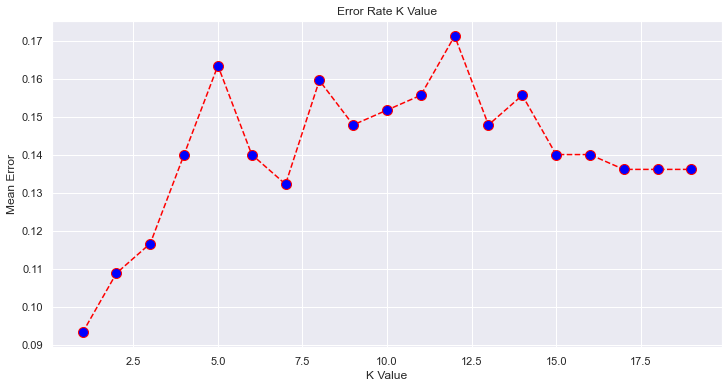

In [9]:
#looking for the optimistic k value
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_lda, y_train)
    pred_i = knn.predict(X_test_lda)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [10]:
# Running KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train_lda, y_train)
y_pred_knn= classifier.predict(X_test_lda) 

print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       123
           1       0.92      0.90      0.91       134

    accuracy                           0.91       257
   macro avg       0.91      0.91      0.91       257
weighted avg       0.91      0.91      0.91       257



In [11]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_lda, y_train)
y_pred_dt = dt.predict(X_test_lda)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       123
           1       0.92      0.90      0.91       134

    accuracy                           0.91       257
   macro avg       0.91      0.91      0.91       257
weighted avg       0.91      0.91      0.91       257



In [12]:

clf = svm.SVC()
clf.fit(X_train_lda, y_train)
y_pred_svm = clf.predict(X_test_lda)

print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       123
           1       0.83      0.93      0.88       134

    accuracy                           0.86       257
   macro avg       0.87      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257



In [13]:

logreg=LogisticRegression()
logreg.fit(X_train_lda,y_train)
y_pred_lr=logreg.predict(X_test_lda)

score2 = accuracy_score(y_test,y_pred_lr)

print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       123
           1       0.82      0.93      0.87       134

    accuracy                           0.86       257
   macro avg       0.87      0.86      0.86       257
weighted avg       0.87      0.86      0.86       257



In [14]:
print('RandomForestClassifier')

model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train_lda, y_train)
y_pred_rf = model.predict(X_test_lda)
score = model.score(X_train_lda, y_train)

print(classification_report(y_test,y_pred_rf))


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       123
           1       0.92      0.90      0.91       134

    accuracy                           0.91       257
   macro avg       0.91      0.91      0.91       257
weighted avg       0.91      0.91      0.91       257



In [15]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def build_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train_lda.shape[1],)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = build_model()
model.fit(X_train_lda, y_train, validation_data=(X_test_lda, y_test), epochs=200, verbose=2)


scores = model.evaluate(X_test_lda, y_test)
print(f'Accuracy: {scores[1]} \n Error: {1 - scores[1]}')

Epoch 1/200
24/24 - 1s - loss: 0.4714 - accuracy: 0.8307 - val_loss: 0.3285 - val_accuracy: 0.8716
Epoch 2/200
24/24 - 0s - loss: 0.3653 - accuracy: 0.8542 - val_loss: 0.3271 - val_accuracy: 0.8794
Epoch 3/200
24/24 - 0s - loss: 0.3629 - accuracy: 0.8581 - val_loss: 0.3252 - val_accuracy: 0.8755
Epoch 4/200
24/24 - 0s - loss: 0.3639 - accuracy: 0.8581 - val_loss: 0.3304 - val_accuracy: 0.8794
Epoch 5/200
24/24 - 0s - loss: 0.3578 - accuracy: 0.8542 - val_loss: 0.3247 - val_accuracy: 0.8755
Epoch 6/200
24/24 - 0s - loss: 0.3600 - accuracy: 0.8542 - val_loss: 0.3219 - val_accuracy: 0.8794
Epoch 7/200
24/24 - 0s - loss: 0.3595 - accuracy: 0.8529 - val_loss: 0.3246 - val_accuracy: 0.8794
Epoch 8/200
24/24 - 0s - loss: 0.3607 - accuracy: 0.8477 - val_loss: 0.3250 - val_accuracy: 0.8755
Epoch 9/200
24/24 - 0s - loss: 0.3587 - accuracy: 0.8529 - val_loss: 0.3239 - val_accuracy: 0.8716
Epoch 10/200
24/24 - 0s - loss: 0.3604 - accuracy: 0.8568 - val_loss: 0.3268 - val_accuracy: 0.8755
Epoch 11/

24/24 - 0s - loss: 0.3441 - accuracy: 0.8685 - val_loss: 0.3119 - val_accuracy: 0.8794
Epoch 84/200
24/24 - 0s - loss: 0.3443 - accuracy: 0.8620 - val_loss: 0.3159 - val_accuracy: 0.8794
Epoch 85/200
24/24 - 0s - loss: 0.3449 - accuracy: 0.8594 - val_loss: 0.3088 - val_accuracy: 0.8872
Epoch 86/200
24/24 - 0s - loss: 0.3483 - accuracy: 0.8581 - val_loss: 0.3154 - val_accuracy: 0.8794
Epoch 87/200
24/24 - 0s - loss: 0.3502 - accuracy: 0.8633 - val_loss: 0.3215 - val_accuracy: 0.8755
Epoch 88/200
24/24 - 0s - loss: 0.3456 - accuracy: 0.8555 - val_loss: 0.3121 - val_accuracy: 0.8833
Epoch 89/200
24/24 - 0s - loss: 0.3445 - accuracy: 0.8646 - val_loss: 0.3126 - val_accuracy: 0.8833
Epoch 90/200
24/24 - 0s - loss: 0.3410 - accuracy: 0.8724 - val_loss: 0.3144 - val_accuracy: 0.8794
Epoch 91/200
24/24 - 0s - loss: 0.3449 - accuracy: 0.8607 - val_loss: 0.3185 - val_accuracy: 0.8599
Epoch 92/200
24/24 - 0s - loss: 0.3422 - accuracy: 0.8646 - val_loss: 0.3129 - val_accuracy: 0.8755
Epoch 93/200


Epoch 165/200
24/24 - 0s - loss: 0.3251 - accuracy: 0.8737 - val_loss: 0.3055 - val_accuracy: 0.8677
Epoch 166/200
24/24 - 0s - loss: 0.3300 - accuracy: 0.8737 - val_loss: 0.3166 - val_accuracy: 0.8638
Epoch 167/200
24/24 - 0s - loss: 0.3317 - accuracy: 0.8724 - val_loss: 0.3090 - val_accuracy: 0.8638
Epoch 168/200
24/24 - 0s - loss: 0.3319 - accuracy: 0.8750 - val_loss: 0.3116 - val_accuracy: 0.8638
Epoch 169/200
24/24 - 0s - loss: 0.3349 - accuracy: 0.8789 - val_loss: 0.3073 - val_accuracy: 0.8677
Epoch 170/200
24/24 - 0s - loss: 0.3270 - accuracy: 0.8815 - val_loss: 0.3153 - val_accuracy: 0.8482
Epoch 171/200
24/24 - 0s - loss: 0.3247 - accuracy: 0.8750 - val_loss: 0.3151 - val_accuracy: 0.8521
Epoch 172/200
24/24 - 0s - loss: 0.3245 - accuracy: 0.8841 - val_loss: 0.3208 - val_accuracy: 0.8560
Epoch 173/200
24/24 - 0s - loss: 0.3335 - accuracy: 0.8737 - val_loss: 0.3099 - val_accuracy: 0.8560
Epoch 174/200
24/24 - 0s - loss: 0.3273 - accuracy: 0.8815 - val_loss: 0.3110 - val_accurac